tensor([0.0765, 0.1334, 0.1861, 0.2080, 0.1861, 0.1334, 0.0765])


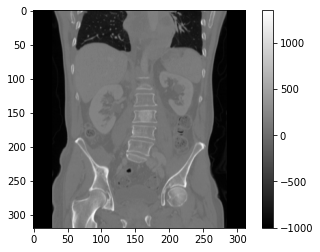

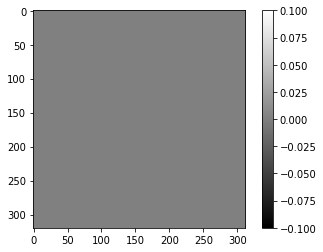

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

filter = torch.exp(-(torch.linspace(-1,1,7)**2))
filter /= filter.sum()
print(filter)

img_pytorch = torch.load('ct_image_pytorch.pth')
filter1d_x = nn.Conv2d(1,1,(7,1),padding=(3,0),bias=False)
filter1d_x.weight.data = filter.view(1,1,-1,1)
filter1d_y = nn.Conv2d(1,1,(1,7),padding=(0,3),bias=False)
filter1d_y.weight.data = filter.view(1,1,1,-1)
img_filt = filter1d_y(filter1d_x(img_pytorch[0:1]))

plt.imshow(img_pytorch.squeeze().data,'gray')
plt.colorbar()
plt.show()

output = torch.load('./output.pth')# replace with your output from torch.load('Uebung0/output.pth')

plt.imshow((img_filt.squeeze().data-output.squeeze().data),'gray')
plt.colorbar()
plt.show()